# EECS 498-007/598-005 Assignment 2-3: MNIST Challenge Problem

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

**Your Answer:**   
Your NAME, #XXXXXXXX

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
%load_ext autoreload
%autoreload 2
import os

Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['two_layer_net.ipynb', 'eecs598', 'two_layer_net.py', 'linear_classifier.py', 'linear_classifier.ipynb', 'challenge_problem.ipynb', 'a2_helpers.py']
```

In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A2 folder, then '2020FA/A2'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A2'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

In [5]:
import sys
GOOGLE_DRIVE_PATH="./"
sys.path.append(GOOGLE_DRIVE_PATH)

## Setup Code
lets Import the functions we need to load visualize and evaluate your Neural Net

In [3]:
from eecs598.a2_challenge_problem import get_w1, get_w2, display_templates, display_w2, evaluate_MNIST, visualize_MNIST

# Instructions
For this challenge problem you are tasked with constructing a 2 layer neural net by hand which classifies hand drawn digits.

## Load and visualize the MNIST dataset
We wil be Evaluating on the test set of MNIST, a dataset containing 28x28 hand drawn digits.

You can run this cell to visualize examples from the training set. You can keep viewing new batches by re-running the cell. Take this oppertunity to train your own biological neural network on MNIST digits :)

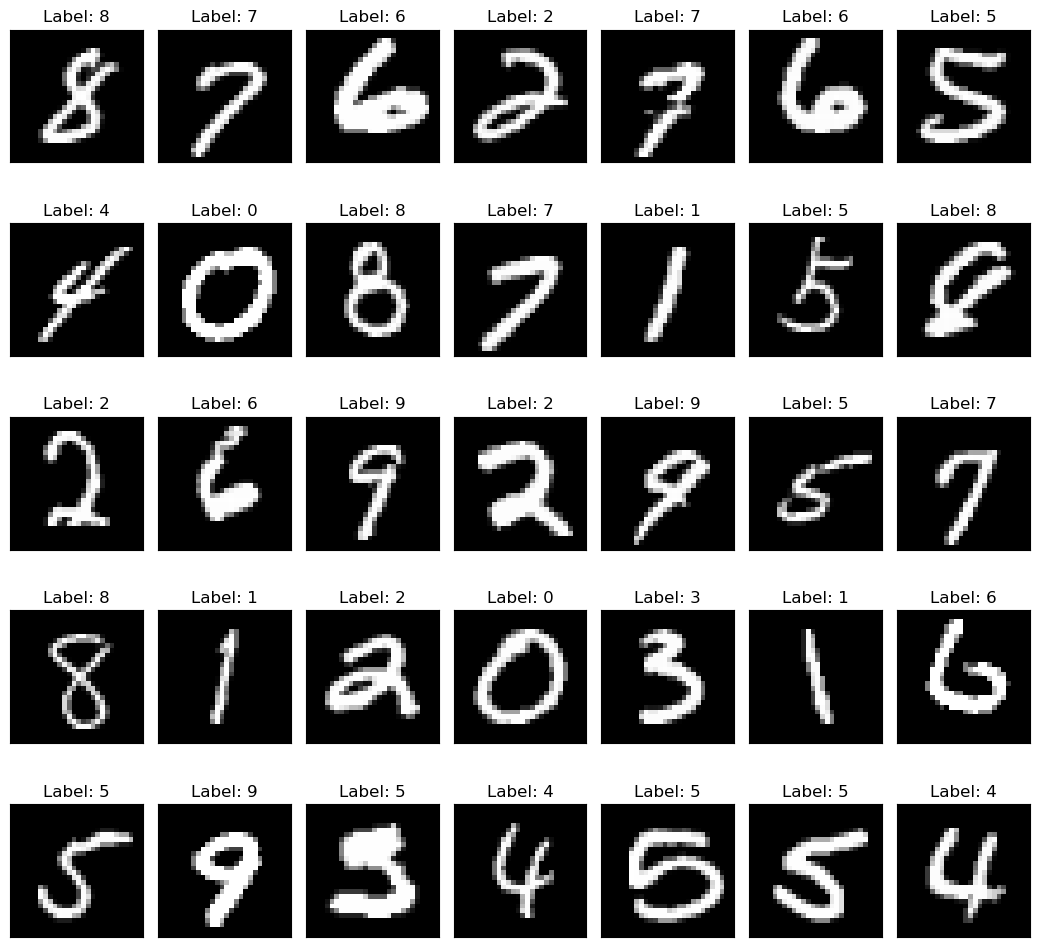

In [4]:
visualize_MNIST()

## Hand design a 2 Layer Neural Network

Using this web GUI (https://web.eecs.umich.edu/gkaul/A2_challenge_problem/) you can set the parameters of a 2 layer neural net. Instructions are on the web page, but at a high level you will hand draw the first layer templates (this is precisly what was visualized at the end Assignmnet 2-2) as well as set the weights of the second fully connected layer. **Make sure to download and save your model when you're done, Additionally upload it to the Assignment 2 folder as** `hand_drawn_weights.jpeg`.

the network has the following architecture:

    input (28x28 flattened) - fully connected layer (734->7) - ReLU - fully connected layer(7->10) - softmax

The output of the network are the scores for each class - in this specific case they correspond to the actual label of each digit(0-9).

### 自己训练网络观察权重

构建和网页端一模一样的网络：28\*28->7，7->10

训练、可视化网络

In [2]:
from two_layer_net import *
from eecs598.a2_helpers import plot_stats
from eecs598 import reset_seed
import torchvision
import torchvision.transforms as transforms

In [3]:
# 定义一个数据预处理流水线，将图像转换为张量并进行标准化
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,)),
])

In [4]:
# running this model on float64 may needs more time, so set it as float32
reset_seed(0)
net = TwoLayerNet(28*28,7,10)

# 创建训练集和测试集，应用定义的转换函数
MNIST_train_set = torchvision.datasets.MNIST(
    "mnist_dataset/", train=True, download=True, transform=transform
)
MNIST_test_set = torchvision.datasets.MNIST(
    "mnist_dataset/", train=False, download=True, transform=transform
)

print(MNIST_train_set)
print(MNIST_test_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist_dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_dataset/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [5]:
# 创建数据加载器,batchsize是整个大小，表示每次取会取整个数据集
train_loader = torch.utils.data.DataLoader(MNIST_train_set, batch_size=len(MNIST_train_set), shuffle=True)
test_loader = torch.utils.data.DataLoader(MNIST_test_set, batch_size=len(MNIST_test_set), shuffle=True)


`DataLoader` 类在 PyTorch 中被用来加载数据并在训练模型时为其提供批量输入。当你对 DataLoader 对象使用 `iter()` 函数，它会创建一个迭代器，这个迭代器可以用来遍历 DataLoader 对象中的所有元素。

`next()` 函数则是用来获取迭代器中的下一个元素。所以，当你使用 `next(iter(train_loader))`，你实际上是在获取 DataLoader 对象中的第一个元素。在你的例子中，这个元素就是一个包含了整个训练集的批次，因为你在创建 DataLoader 时设置了 `batch_size=len(MNIST_train_set)`。

所以，`train_data, train_labels = next(iter(train_loader))` 这行代码实际上是将整个训练集加载到内存中，并将其转化为 PyTorch 张量。这就解释了为什么这行代码执行了10多秒——因为它在加载和处理大量的数据。

In [6]:
# 将数据加载器的输出转换为张量
train_data, train_labels = next(iter(train_loader))
test_data, test_labels = next(iter(test_loader))

In [24]:
# 首先，创建两个数据加载器（train_loader和test_loader），用于从训练集和测试集中加载数据。
# 数据加载器将数据集分割成批次，每个批次包含batch_size个样本。shuffle=True表示在每个周期（epoch）开始时对数据进行随机重排。
# 然后，next(iter(train_loader))和next(iter(test_loader))的作用是从训练集和测试集加载器中提取一个批次的数据。
# iter()函数将train_loader和test_loader转换为迭代器，而next()函数从迭代器中获取下一个元素。
# 由于我们在创建数据加载器时将batch_size设置为整个数据集的大小（len(MNIST_train_set)和len(MNIST_test_set)），
# 所以这里的“下一个元素”实际上就是整个数据集。这样，train_data和train_labels包含了训练集中的所有图像和标签，
# test_data和test_labels包含了测试集中的所有图像和标签。
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_data = train_data.to(device)
train_labels = train_labels.to(device)
test_data = test_data.to(device)
test_labels = test_labels.to(device)

train_data = train_data.view(train_data.shape[0], -1)
test_data = test_data.view(test_data.shape[0], -1)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


In [38]:
# 训练你的两层神经网络
net.train(train_data, train_labels, test_data, test_labels, 
          num_iters=3000, 
          batch_size=128, 
          learning_rate=1e-3,
          verbose=True
         )
# 这个网络没有重建，每次运行都是继续训练
# 使用测试集评估神经网络
predictions = net.predict(test_data)
accuracy = (predictions == test_labels).float().mean().item()
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


iteration 0 / 3000: loss 0.565344
iteration 100 / 3000: loss 0.407701
iteration 200 / 3000: loss 0.565951
iteration 300 / 3000: loss 0.334129
iteration 400 / 3000: loss 0.398909
iteration 500 / 3000: loss 0.530077
iteration 600 / 3000: loss 0.542769
iteration 700 / 3000: loss 0.462543
iteration 800 / 3000: loss 0.284734
iteration 900 / 3000: loss 0.391723
iteration 1000 / 3000: loss 0.409620
iteration 1100 / 3000: loss 0.431686
iteration 1200 / 3000: loss 0.272309
iteration 1300 / 3000: loss 0.433924
iteration 1400 / 3000: loss 0.461544
iteration 1500 / 3000: loss 0.570163
iteration 1600 / 3000: loss 0.431356
iteration 1700 / 3000: loss 0.441114
iteration 1800 / 3000: loss 0.495077
iteration 1900 / 3000: loss 0.371433
iteration 2000 / 3000: loss 0.382822
iteration 2100 / 3000: loss 0.497909
iteration 2200 / 3000: loss 0.450425
iteration 2300 / 3000: loss 0.407430
iteration 2400 / 3000: loss 0.450107
iteration 2500 / 3000: loss 0.378280
iteration 2600 / 3000: loss 0.393325
iteration 270

In [44]:
def visualize_grid(Xs, ubound=255.0, padding=1):
    """
    将一个4D张量（这里是W1）转换为一个可视化网格。
    该网格的形状是(grid_height, grid_width, C)，
    其中grid_height和grid_width是根据输入张量的形状、网格大小和填充计算得到的。
    在这个过程中，每个图像都被归一化到[0, ubound]的范围内。
    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    (N, H, W, C) = Xs.shape
    # print(Xs.shape)
    grid_size = int(math.ceil(math.sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = torch.zeros((grid_height, grid_width, C), device=Xs.device)
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = torch.min(img), torch.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    return grid


In [80]:
from eecs598.a2_challenge_problem import colormap  
# 这个colormap是和网页端一样的、画笔的颜色分布，是一个list，包含了(画笔的颜色rgb,对应的数值)，你可以观察到是从深红色到深蓝色
# 他用了126个画笔颜色分级。由于权重是从图片中读取的，所以我们可视化自己网络的权重的颜色分布需要和他相同

# 创建imshow的cmap，让灰度图映射到画笔颜色的空间
from matplotlib.colors import ListedColormap
import numpy as np

color_map_list = [v[0] for v in colormap]  # 取出 画笔的颜色rgb

print(len(color_map_list))
cmap = ListedColormap(np.array(color_map_list) / 255)

126


In [81]:
import matplotlib.colors as mcolors
def show_net_weights_my(net,cmap):
    W1 = net.params["W1"]
    W1 = W1.reshape(1, 28, 28, -1).transpose(0, 3)
    # colors = ["#69001f", "white", "#09386c"]
    # colors = ["#69001f", "#09386c"]
    # cmap = mcolors.LinearSegmentedColormap.from_list("", colors)
    plt.imshow(visualize_grid(W1, padding=3).type(torch.uint8).cpu(),cmap=cmap)
    # Axes是一个绘图区域，它可以包含坐标轴、刻度、标签等。plt.gca()返回当前的Axes实例。
    # 在这个例子中，plt.gca().axis("off")将当前Axes实例的坐标轴关闭，这样图像周围就没有坐标轴和刻度了。
    plt.gca().axis("off")  # gca Get Current Axes
    
    # 保存图片 bbox_inches='tight' 和 pad_inches=0 确保在保存图片时没有额外的空白边框。
    plt.savefig("weight_pic.png", bbox_inches='tight', pad_inches=0)
    plt.show()

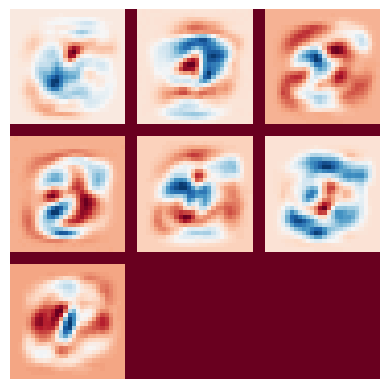

In [82]:
show_net_weights_my(net,cmap)

In [83]:
torch.set_printoptions(precision=1)  # 打印精度为1位小数
net.params['W2'].T

tensor([[-0.1, -0.0, -0.1,  0.1, -0.3,  0.7, -0.6],
        [-0.3, -0.3,  0.1, -0.0, -0.1, -0.6,  0.7],
        [ 0.3,  0.0, -0.4,  0.0, -0.6,  0.1,  0.4],
        [-0.4, -0.1, -0.2, -0.2, -0.0,  0.4,  0.4],
        [ 0.5, -0.0,  0.1, -0.1,  0.5, -0.5, -0.4],
        [-0.1, -0.3,  0.3,  0.0,  0.3,  0.4, -0.2],
        [ 0.7, -0.5,  0.2, -0.0, -0.3, -0.1, -0.2],
        [-0.6,  0.8, -0.1,  0.0,  0.1, -0.3, -0.0],
        [ 0.1, -0.1,  0.1,  0.2,  0.1,  0.1,  0.2],
        [-0.0,  0.4,  0.0, -0.1,  0.3, -0.2, -0.1]], device='cuda:0')

In [74]:
import numpy as np
for i in np.arange(-1,1.1,0.1):
    print(f"{i:.1f}", end=' ')

-1.0 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 

## Load the Weights of your 2 layer neural net
Upload your `hand_drawn_weights.jpeg` that you downloaded from the webpage and set the path below

In [10]:
from eecs598.a2_challenge_problem import get_w1, get_w2, display_templates, display_w2, evaluate_MNIST, visualize_MNIST
# from google.colab import drive
# drive.mount('/content/drive')
%load_ext autoreload
%autoreload 2
import os
path_to_weights = r'D:\Paper\ECCS_DLCV\Homework\1\A2\path\to\hand_drawn_weights.jpg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualize your first layer features (resized as 28x28)
These templates extract features from an input digit

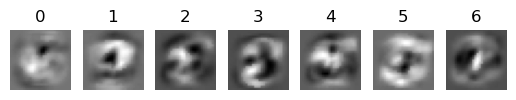

In [11]:
w1 = get_w1(path_to_weights)
display_templates(w1)

## Visualize your second layer
The second layer will define linear combinations of our h1 representation

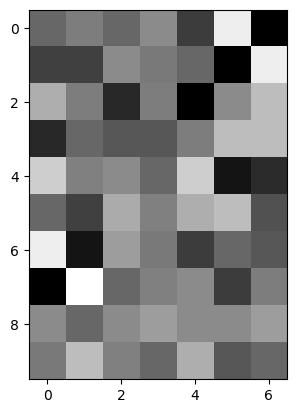

In [12]:
w2 = get_w2(path_to_weights)
display_w2(w2)

## Testing our NN on MNIST

Now that you have designed and loaded your two layer neural network, it's time to evaluate our classifier on the test set.

Simple solutions should be able to exceed ~20% accuracy. While this is relitivly low for MNIST (the exact same model architecture can achive ~92% when trained end to end using SGD), the goal of this problem is to help you think about how a 2 layer neural network can approximate an arbitrary function.

you will recieve one point for every 2% you achive above 18% - we will grade using the following breakdown: 

| Accuracy | pts |
| --- | --- | 
| 18-20%  | 1/5  |
| 20-22%  | 2/5  |
| 22-24%  | 3/5  | 
| 24-26%  | 4/5  |
| 26%+   | 5/5  |

In [13]:
accuracy, correct_digits, incorrect_digits = evaluate_MNIST(w1,w2)
print('your network scored',(accuracy)*100,'% on the MNIST test set')

your network scored 67.84 % on the MNIST test set


## This portion of the notebok will help you characterize your networks preformance

Recall that a loss function measures the discrepency between our models prediction and the ground truth. When we evaluated your solution, we computed the cross entropy loss of each prediction as defined by `torch.nn.CrossEntropyLoss()` 


## Visualize lowest loss examples

These are examples that your model classified correctly. The following list `correct_digits` is sorted by loss (lowest first), this means that your model's predicted distribution was close to the actual one hot distribution for these examples. These are examples that your model doesn't have difficulty classifying. 


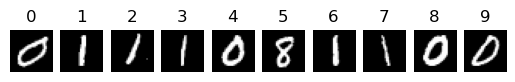

In [5]:
# you can change the indices to display more digits or different digits
display_templates(correct_digits[:10])

## Visualize highest loss examples

These are examples that your model classified incorrectly. The following list `incorrect_digits` is sorted by loss (highest first), this means that your model's predicted distribution was far from the actual one hot distribution for these examples. Theese are examples that your model had the most difficulty classifying. Thinking about how your network handles these examples will give you a good starting point for improving your model

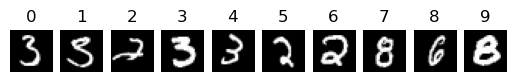

In [6]:
#you can change the indices to display more digits or different digits
display_templates(incorrect_digits[:10])

# Submit Your Work
After completing all 3 notebooks for this assignment (`linear_classifier.ipynb`, `two_layer_net.ipynb`,  and this notebook,`challenge_problem.ipynb` ), run the following cell to create a `.zip` file for you to download and turn in. **Please MANUALLY SAVE every `*.ipynb` and `*.py` files before executing the following cell:**

In [ ]:
from eecs598.submit import make_a2_submission

# TODO: Replace these with your actual uniquename and umid
uniquename = None
umid = None
make_a2_submission(GOOGLE_DRIVE_PATH, uniquename, umid)